In [13]:
import heapq
from collections import Counter
from math import prod
import numpy as np
from scipy.optimize import linprog
from shapely.geometry import Polygon

In [16]:
#FILE = "example.txt"
FILE = "input.txt"

In [17]:
inputs = [
    tuple(map(int, line.rstrip('\n').split(','))) for line in open(FILE)
]

In [18]:
inputs

[(97803, 50388),
 (97803, 51592),
 (97560, 51592),
 (97560, 52829),
 (98065, 52829),
 (98065, 54043),
 (97946, 54043),
 (97946, 55285),
 (98089, 55285),
 (98089, 56406),
 (97235, 56406),
 (97235, 57723),
 (97815, 57723),
 (97815, 58870),
 (97273, 58870),
 (97273, 59942),
 (96461, 59942),
 (96461, 61161),
 (96382, 61161),
 (96382, 62494),
 (96686, 62494),
 (96686, 63718),
 (96510, 63718),
 (96510, 64766),
 (95757, 64766),
 (95757, 65907),
 (95331, 65907),
 (95331, 67165),
 (95215, 67165),
 (95215, 68303),
 (94762, 68303),
 (94762, 69455),
 (94339, 69455),
 (94339, 70592),
 (93873, 70592),
 (93873, 71538),
 (93020, 71538),
 (93020, 72784),
 (92768, 72784),
 (92768, 73751),
 (91984, 73751),
 (91984, 74858),
 (91452, 74858),
 (91452, 75465),
 (90124, 75465),
 (90124, 76547),
 (89576, 76547),
 (89576, 77722),
 (89147, 77722),
 (89147, 78533),
 (88201, 78533),
 (88201, 79485),
 (87458, 79485),
 (87458, 80437),
 (86715, 80437),
 (86715, 81272),
 (85834, 81272),
 (85834, 82186),
 (85048, 82186

In [19]:
len(inputs)

496

In [27]:
input_figure = Polygon(inputs)

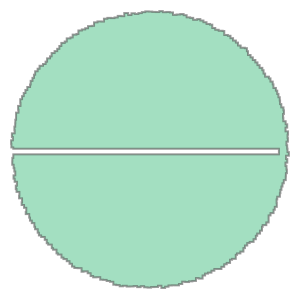

In [28]:
input_figure

In [45]:
test_figure = Polygon([
(94927,48406),
(94927,50365),
(2412,48406),
(2412,47178),
])

test_figure = Polygon([
(94927,50365),
(94927,52000),
(3000,52000),
(3000,50365),
])


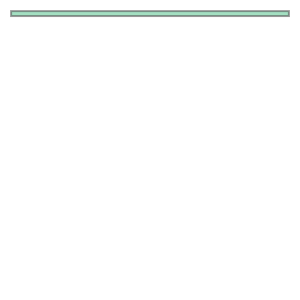

In [46]:
test_figure

In [47]:
input_figure.contains(test_figure)

True

In [21]:
max_dist = 0
max_dist_point = (0,0)
for i in range(len(inputs)-1):
    dist = (inputs[i][0]**2 + inputs[i][1]**2)**0.5 - (inputs[i+1][0]**2 + inputs[i+1][1]**2)**0.5
    max_dist = max(max_dist, dist)
    if dist == max_dist:
        max_dist_point = (inputs[i], inputs[i+1])
max_dist
max_dist_point


((94927, 48406), (2412, 48406))

In [22]:
def is_colinear(point, a, b):
    if (b[0] - a[0]) * (point[1] - a[1]) != (b[1] - a[1]) * (point[0] - a[0]):
        return False
    if min(a[0], b[0]) <= point[0] <= max(a[0], b[0]) and min(a[1], b[1]) <= point[1] <= max(a[1], b[1]):
        return True
    return False

In [23]:
def is_inside(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False
    
    for i in range(n):
        a = polygon[i]
        b = polygon[(i + 1) % n]

        if is_colinear(point, a, b):
            return True

        if (a[1] > point[1]) != (b[1] > point[1]):
            l = (a[0] - point[0]) * (b[1] - a[1])
            r = (point[1] - a[1]) * (b[0] - a[0])

            if (b[1] > a[1] and l+r > 0) or (b[1] < a[1] and l+r < 0):
                inside = not inside
    return inside


In [25]:
test_points = [
    # in shape
    (2399,50818),
    (2399,50365),
    (94927,50365),
    (94927,48406),
    (2412,48406),
    (2412,47178),
    (2078,47178),
    # out of shape
    (2398,50365),
    (94928,50366),
    (94926,48405),
    (94928,48407),
    (94926,48405),
    (94928,48409),
    (2411,48405),
    (2413,48407),
    
]
for i in test_points:
    print(i, is_inside(i, inputs))
#is_inside((12,1), inputs)

(2399, 50818) True
(2399, 50365) True
(94927, 50365) True
(94927, 48406) True
(2412, 48406) True
(2412, 47178) True
(2078, 47178) True
(2398, 50365) False
(94928, 50366) True
(94926, 48405) True
(94928, 48407) True
(94926, 48405) True
(94928, 48409) True
(2411, 48405) False
(2413, 48407) False


In [58]:
areas = {}
checked_points = set()
max_area = 0
for i in range(len(inputs)):
    for j in range(len(inputs)):
        #if ((i, j) in areas) or ((j, i) in areas) or i == j:
        if i == j or (i,j) in checked_points or (j,i) in checked_points or inputs[i][0] == inputs[j][0] or inputs[i][1] == inputs[j][1]:
            continue
        a, b = inputs[i], inputs[j]
        oppo_a = (inputs[i][0], inputs[j][1])
        oppo_b = (inputs[j][0], inputs[i][1])

        test_figure = Polygon([a, oppo_b, b, oppo_a])
        if not input_figure.contains(test_figure):
            checked_points.add((i,j))
            checked_points.add((j,i))
            continue

        area = (abs(a[0] - b[0]) + 1) * (abs(a[1] - b[1]) + 1)

        #if is_inside(oppo_a, inputs) and is_inside(oppo_b, inputs):
            #areas[i, j] = (abs(a[0] - b[0]) + 1) * (abs(a[1] - b[1]) + 1)
        max_area = max(max_area, area)
        checked_points.add((i,j))
        checked_points.add((j,i))

In [59]:
areas

{}

In [60]:
max_area

1543501936

4581479815 was too high